In [11]:
import torch

from embedding import load_embeddings_safetensors, read_fasta
new_emb, new_ids = load_embeddings_safetensors("outputs/embedding-newly-discovered-35M-avg.safetensors")
new_seqs = read_fasta("data/newly_discovered_dissimilar_proteins_2024.fasta")

pre_emb, pre_ids = load_embeddings_safetensors("outputs/embedding-pre-training-35M-avg.safetensors")
pre_seqs = read_fasta("data/pre_training.fasta")

In [5]:
dataset = [(seq, 0) for seq in new_emb] + [(seq, 1) for seq in pre_emb]

In [9]:
type(new_emb)

torch.Tensor

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

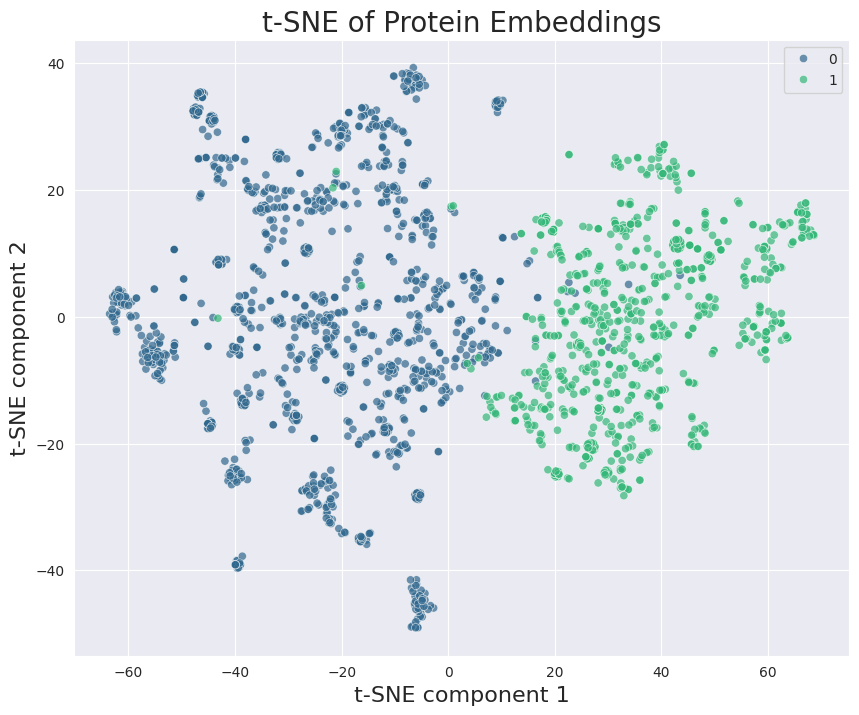

In [13]:
tsne_reducer = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_embeddings = tsne_reducer.fit_transform(torch.cat([new_emb, pre_emb]))

labels = [x[1] for x in dataset]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1],
    palette='viridis', hue=labels, alpha=0.7
)
plt.title('t-SNE of Protein Embeddings', size=20)
plt.xlabel('t-SNE component 1', size=16)
plt.ylabel('t-SNE component 2', size=16)
plt.show()

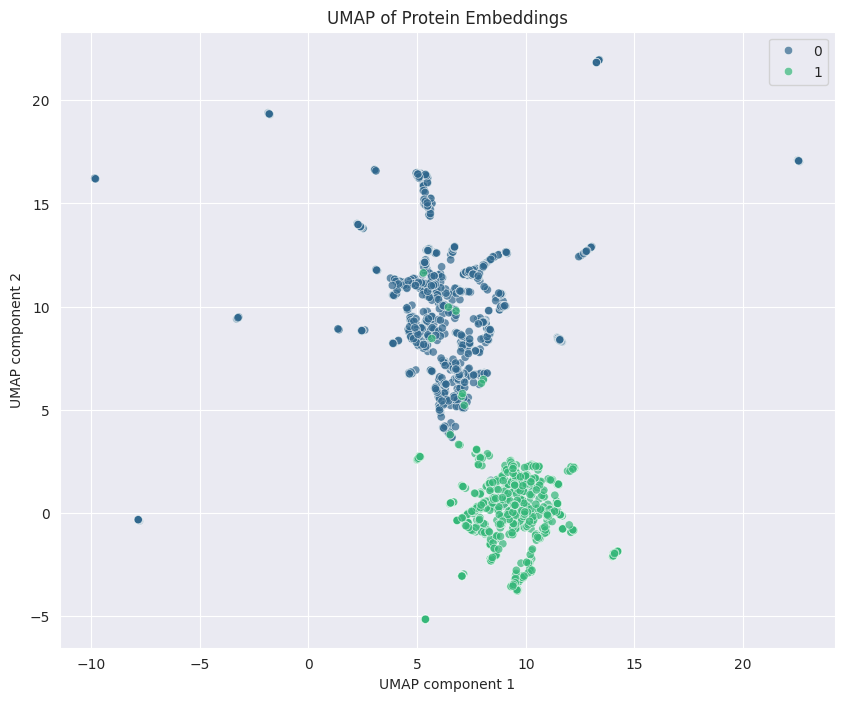

In [14]:
import umap

umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
umap_embeddings = umap_reducer.fit_transform(torch.cat([new_emb, pre_emb]))

labels = [x[1] for x in dataset]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=umap_embeddings[:, 0], y=umap_embeddings[:, 1],
    palette='viridis', hue=labels, alpha=0.7
)
plt.title('UMAP of Protein Embeddings')
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.show()

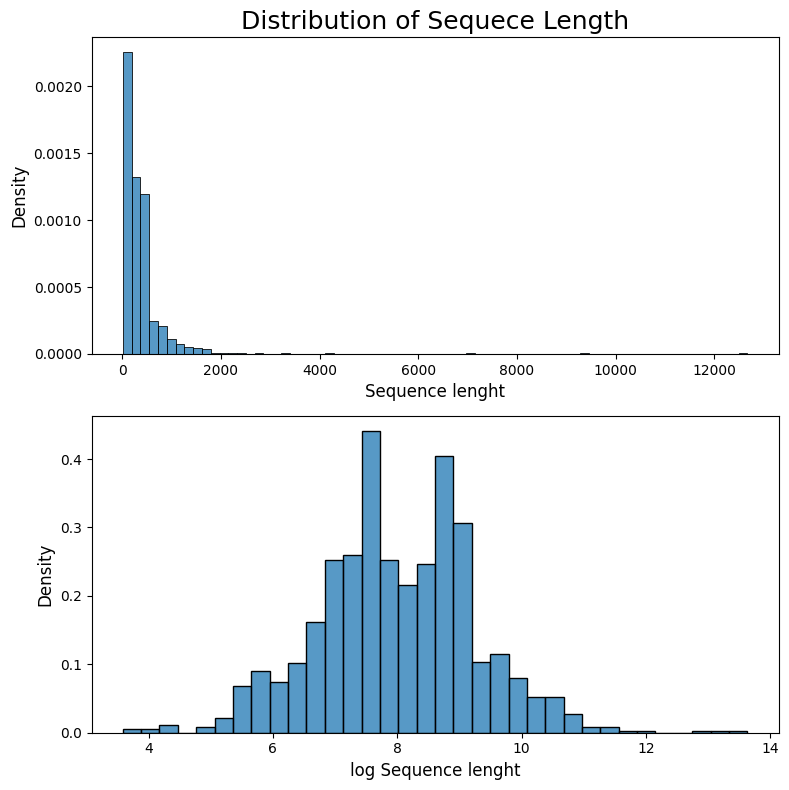

In [43]:
lengths = [len(s[1]) for s in seqs]

log_lenghts = np.log2(lengths)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(lengths, ax=ax[0], stat='density')
sns.histplot(log_lenghts, ax=ax[1], stat='density')

# Formatting
ax[0].set_title('Distribution of Sequece Length', size=18)
ax[0].set_xlabel('Sequence lenght', size=12)
ax[0].set_ylabel('Density', size=12)
ax[1].set_xlabel('log Sequence lenght', size=12)
ax[1].set_ylabel('Density', size=12)

plt.tight_layout()
plt.show()

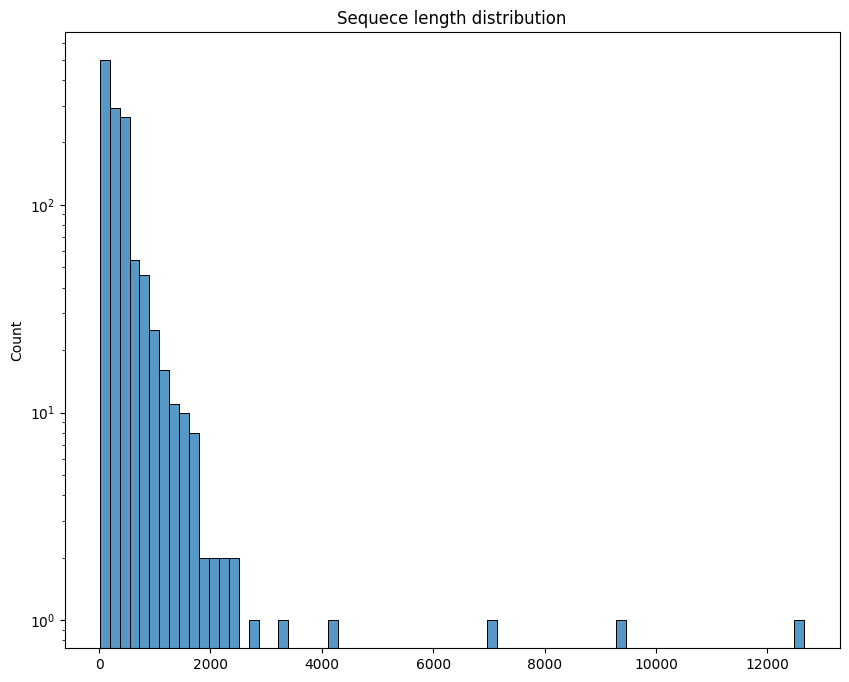

In [7]:
plt.figure(figsize=(10, 8))
sns.histplot(lengths)
plt.title('Sequece length distribution')
plt.yscale('log')
plt.show()

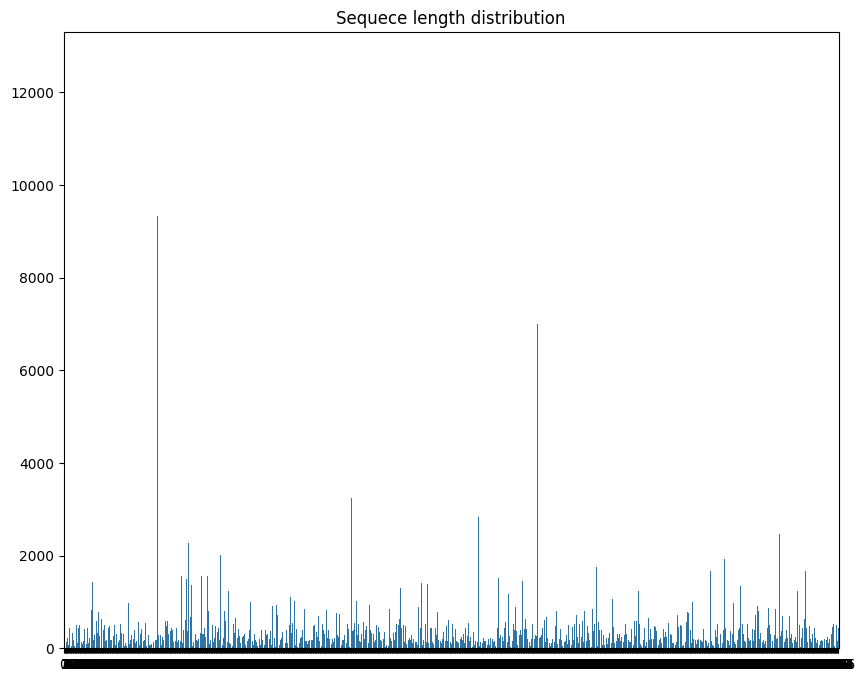

In [8]:
plt.figure(figsize=(10, 8))
sns.barplot(lengths)
plt.title('Sequece length distribution')
plt.show()